In [22]:
from funkyml.classification import Models
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


About this file

This CSV file contains a dataset of 240 stars of 6 classes:

    Brown Dwarf -> Star Type = 0

    Red Dwarf -> Star Type = 1

    White Dwarf-> Star Type = 2

    Main Sequence -> Star Type = 3

    Supergiant -> Star Type = 4

    Hypergiant -> Star Type = 5

The Luminosity and radius of each star is calculated w.r.t. that of the values of Sun.
Lo = 3.828 x 10^26 Watts
Ro = 6.9551 x 10^8 m

In [2]:
df = pd.read_csv('6 class csv.csv')
#df = pd.read_csv ('https://github.com/YBIFoundation/Dataset/raw/main/Stars.csv')
df.head(10)

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M
5,2840,0.000650,0.1100,16.98,0,Red,M
6,2637,0.000730,0.1270,17.22,0,Red,M
7,2600,0.000400,0.0960,17.40,0,Red,M
8,2650,0.000690,0.1100,17.45,0,Red,M
9,2700,0.000180,0.1300,16.05,0,Red,M


In [3]:
print("La base de datos tiene", df.shape[0],
      "observaciones y", df.shape[1], "columnas")
print("Las variables de la base de datos son ", df.columns)

La base de datos tiene 240 observaciones y 7 columnas
Las variables de la base de datos son  Index(['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)',
       'Absolute magnitude(Mv)', 'Star type', 'Star color', 'Spectral Class'],
      dtype='object')


In [4]:
df[['Spectral Class']].value_counts()


Spectral Class
M                 111
B                  46
O                  40
A                  19
F                  17
K                   6
G                   1
Name: count, dtype: int64

In [5]:
df[['Star type']].value_counts()


Star type
0            40
1            40
2            40
3            40
4            40
5            40
Name: count, dtype: int64

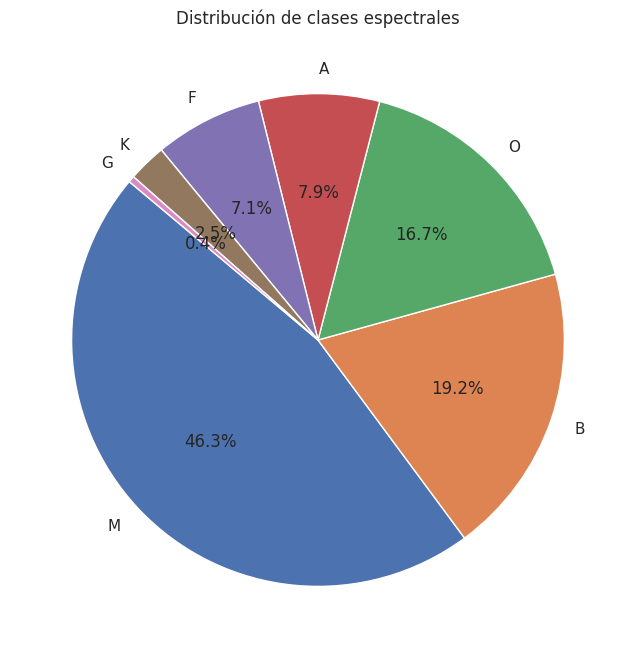

In [6]:
# Aplicar un estilo de Seaborn
sns.set_theme(style="whitegrid")

conteos_star_type = df['Spectral Class'].value_counts()

# Crear el gráfico de torta
plt.figure(figsize=(8, 8))  # Tamaño del gráfico
plt.pie(conteos_star_type, labels=conteos_star_type.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de clases espectrales')
plt.show()

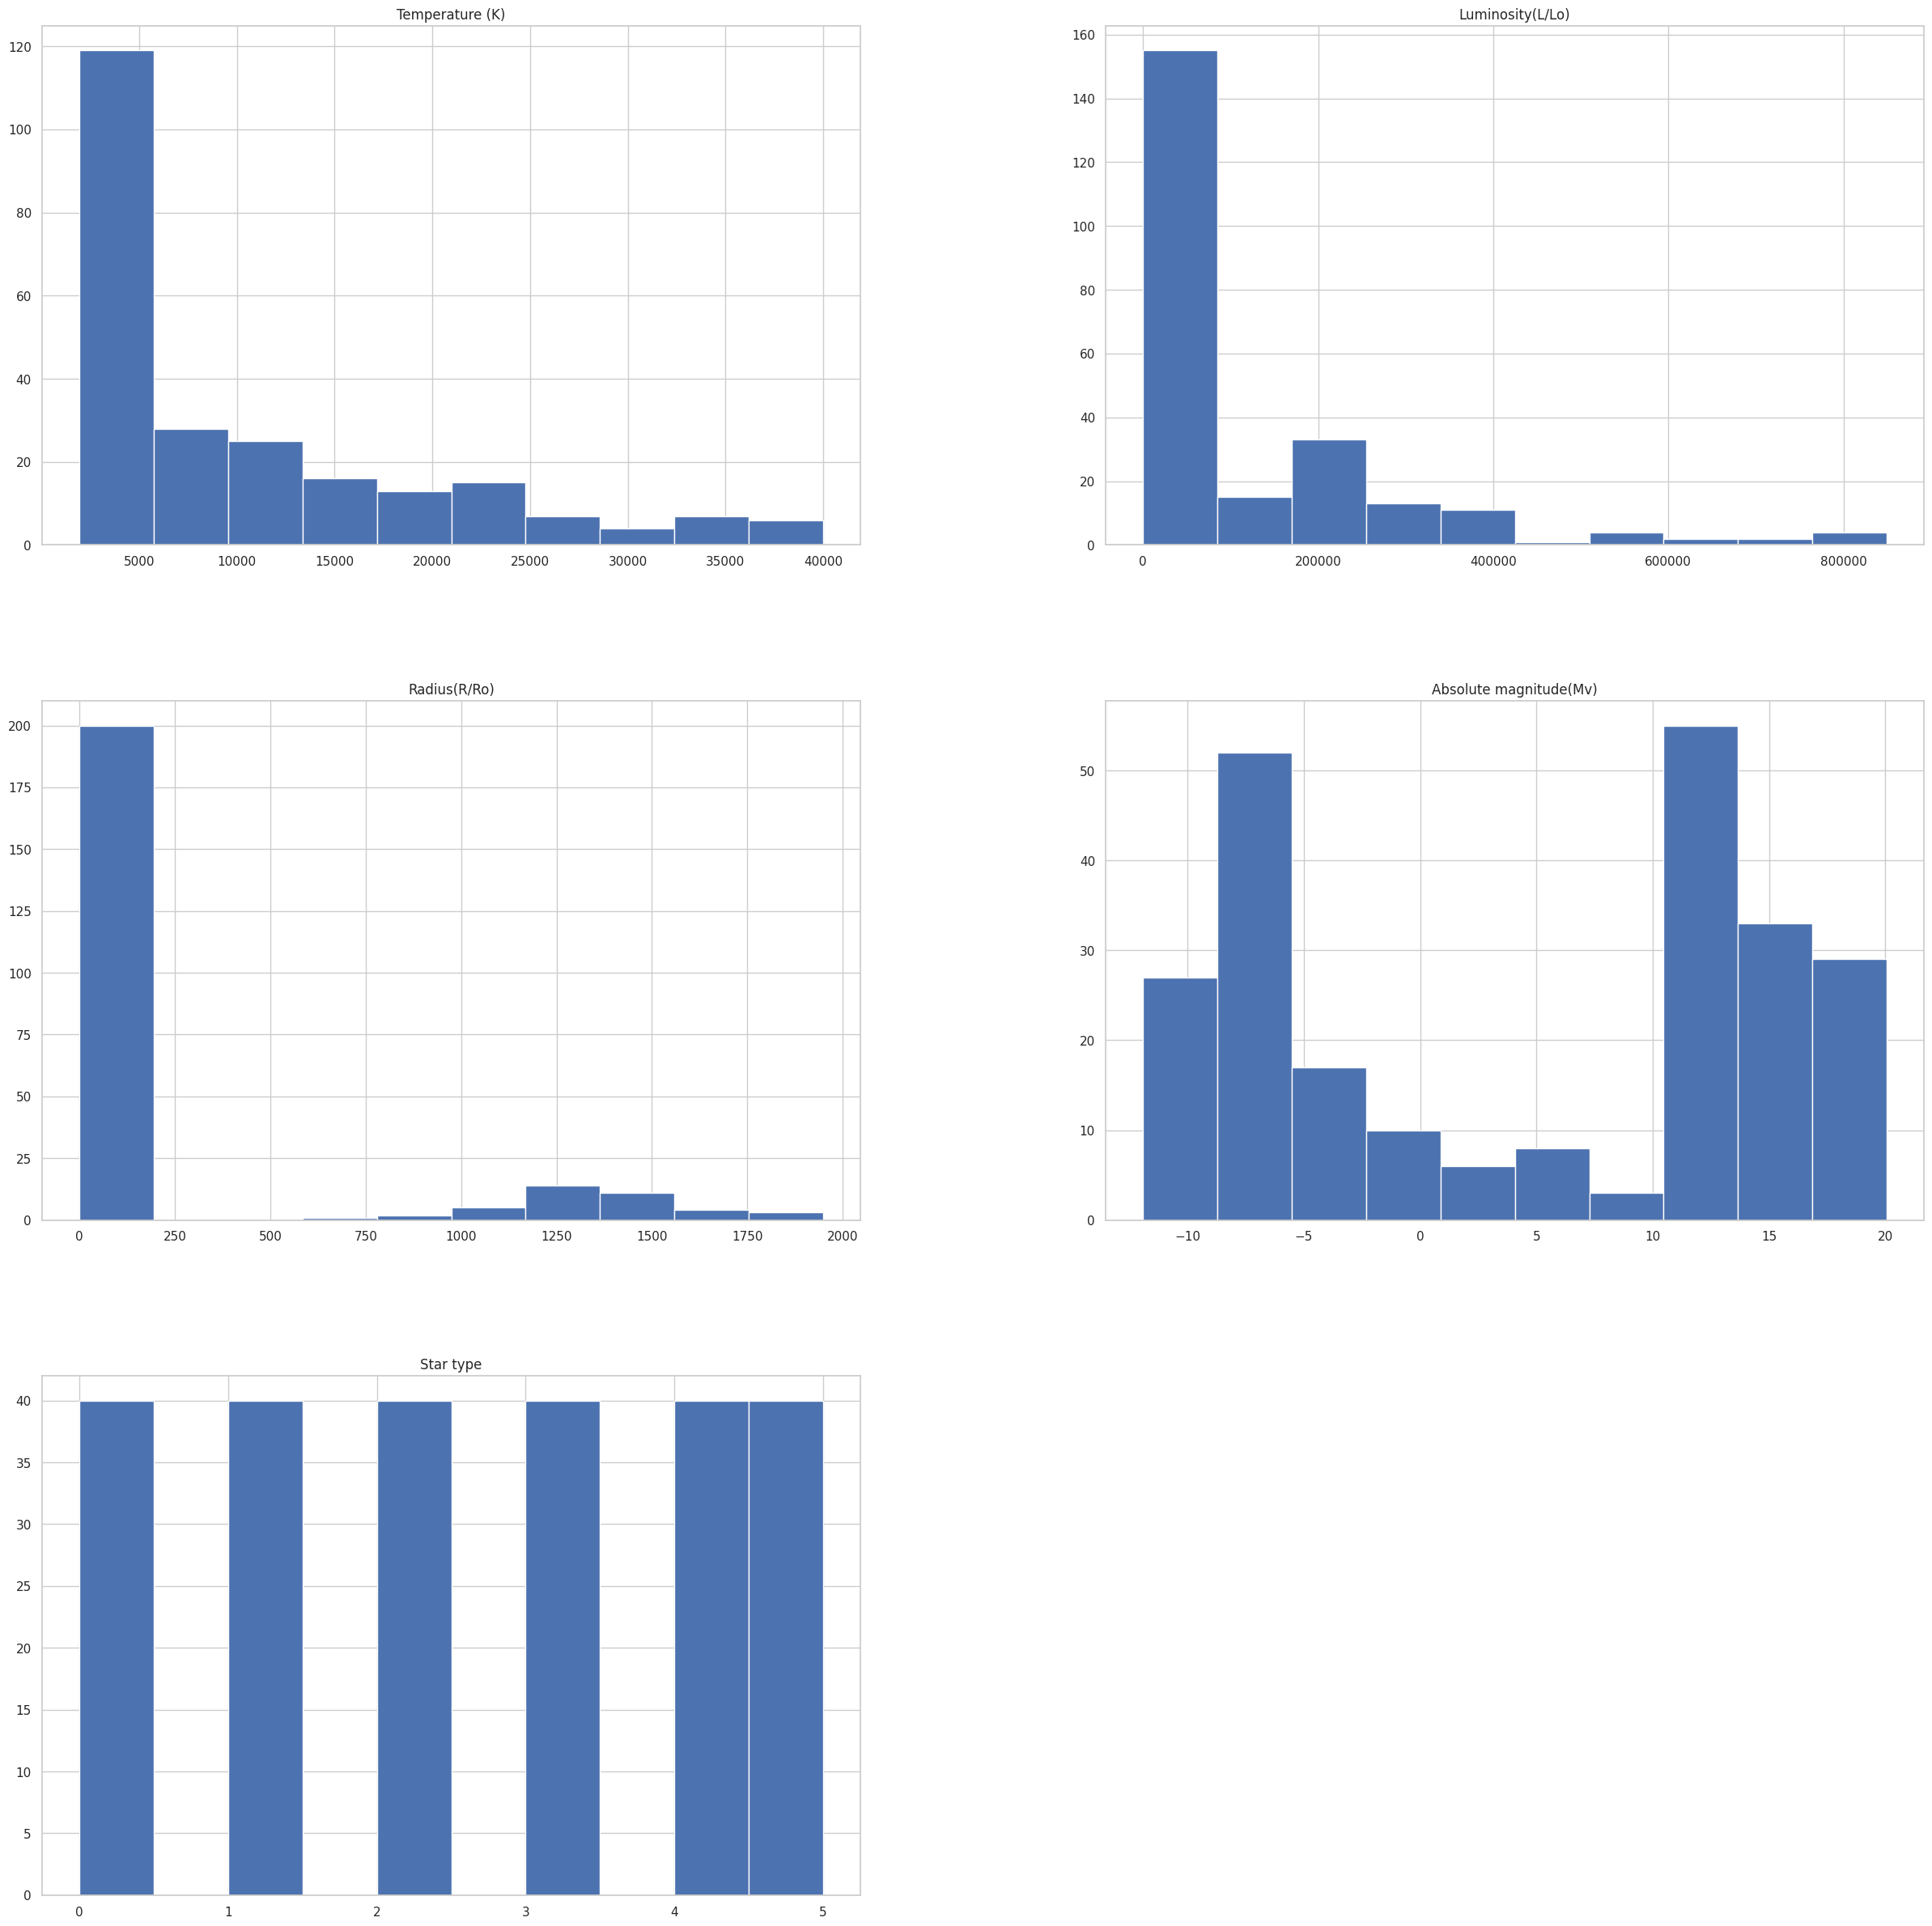

In [7]:
plot_hist = df.hist(figsize=(30, 30))


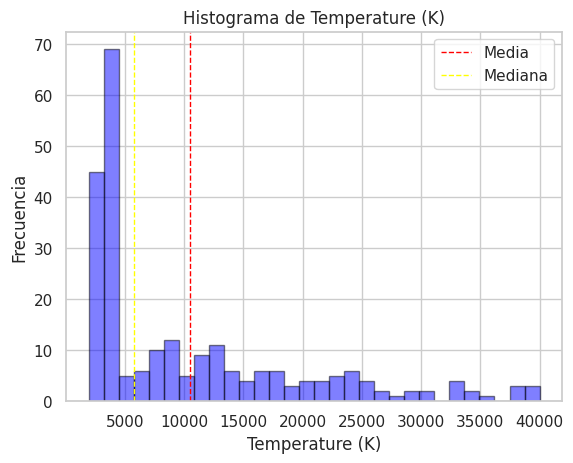

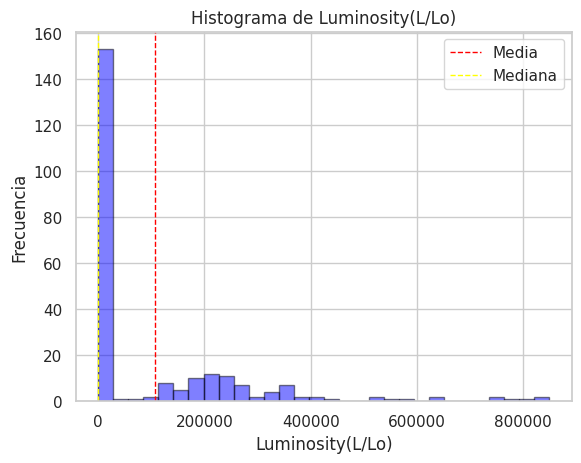

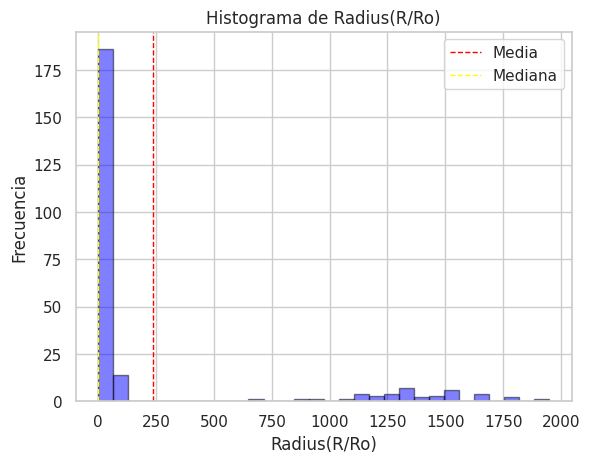

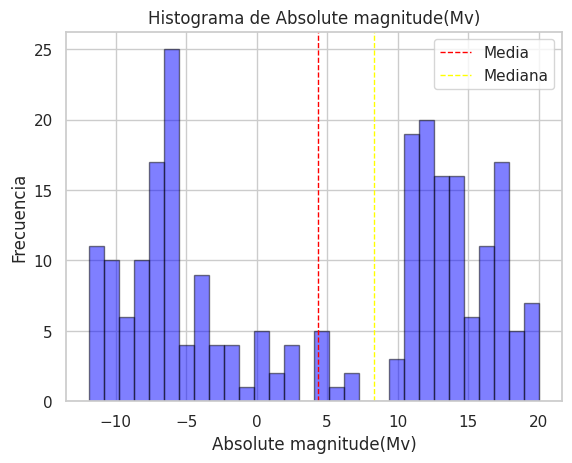

In [8]:

def plot_hist(df, column_name):
    # Calcula la media y la mediana
    mean_value = df[column_name].mean()
    median_value = df[column_name].median()
    
    # Crea el histograma
    plt.hist(df[column_name], bins=30, alpha=0.5, color='blue', edgecolor='black')
    
    # Dibuja líneas para la media y la mediana
    plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=1)
    plt.axvline(median_value, color='yellow', linestyle='dashed', linewidth=1)
    
    # Agrega leyenda, título y etiquetas
    plt.legend({'Media':mean_value, 'Mediana':median_value})
    plt.title(f'Histograma de {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frecuencia')
    
    

    # Muestra el gráfico
    plt.show()

# Suponiendo que tienes un DataFrame llamado df
# Puedes llamar a la función para cada columna así:
plot_hist(df, 'Temperature (K)')
plot_hist(df, 'Luminosity(L/Lo)')
plot_hist(df, 'Radius(R/Ro)')
plot_hist(df, 'Absolute magnitude(Mv)')


#'Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 
# 'Absolute magnitude(Mv)', 'Star type', 'Star color', 'Spectral Class'

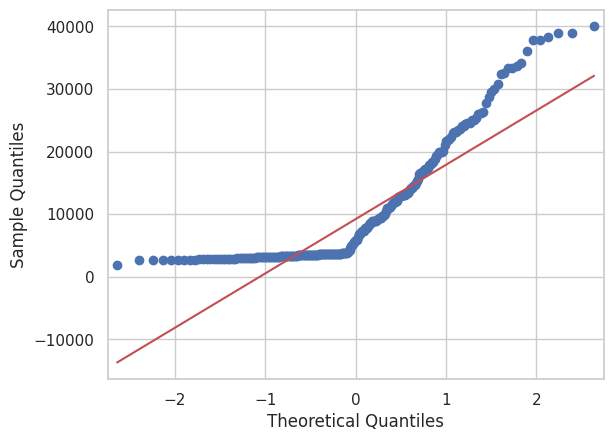

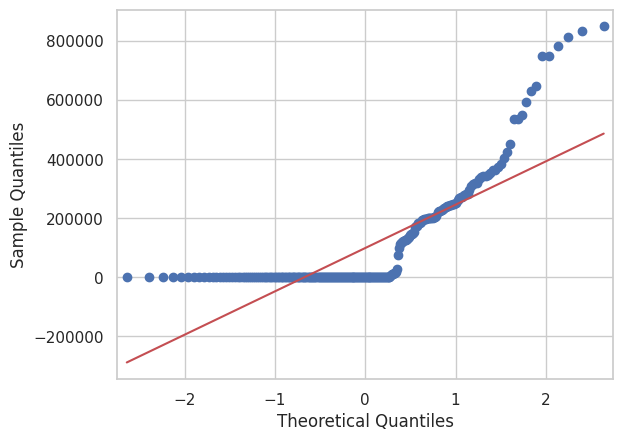

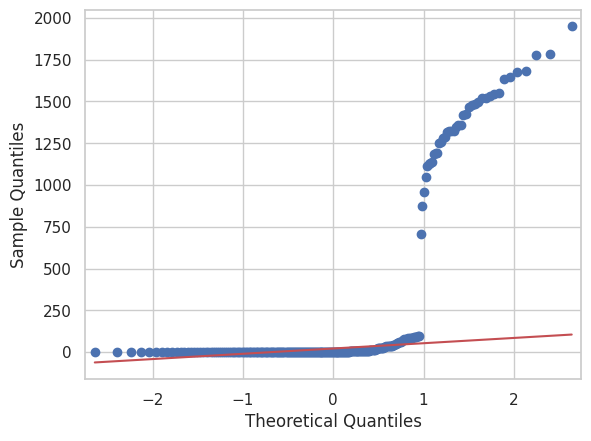

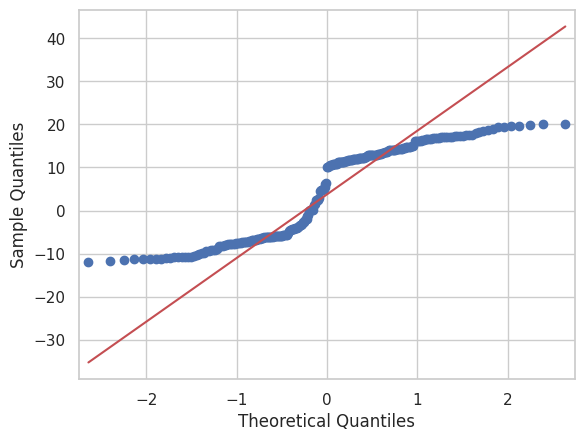

In [9]:
sm.qqplot(df['Temperature (K)'],line='q');
sm.qqplot(df['Luminosity(L/Lo)'],line='q');
sm.qqplot(df['Radius(R/Ro)'],line='q');
sm.qqplot(df['Absolute magnitude(Mv)'],line='q');

#'Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 
# 'Absolute magnitude(Mv)', 'Star type', 'Star color', 'Spectral Class'

El gráfico Q-Q compara la distribución empírica de nuestra variable en el eje Y (con la etiqueta 'Sample Quantities') contra la distribución esperada de la variable (bajo la etiqueta 'Theoretical Quantities').

La opción `line='q'` permite trazar una línea entre cantidades observadas y esperadas en los cuantiles de nuestra variable. Una distribución normal tendrá la mayoría de sus datos cercanos a la línea.

In [10]:
df.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


In [11]:
#creacion de la matriz de atributos
attr_mat = df.drop(['Star type'], axis =1)    #el vector objetivo es star type, pues es lo q queremos predecir

attr_mat.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,Red,M
1,3042,0.000500,0.1542,16.60,Red,M
2,2600,0.000300,0.1020,18.70,Red,M
3,2800,0.000200,0.1600,16.65,Red,M
4,1939,0.000138,0.1030,20.06,Red,M


In [12]:
df.describe().T.style.bar(subset=['mean'],color='#606ff2').background_gradient(subset=['std'], cmap='turbo').background_gradient(subset=['50%'], cmap='Reds')

,count,mean,std,min,25%,50%,75%,max
Temperature (K),240.000000,10497.462500,9552.425037,1939.000000,3344.250000,5776.000000,15055.500000,40000.000000
Luminosity(L/Lo),240.000000,107188.361635,179432.244940,0.000080,0.000865,0.070500,198050.000000,849420.000000
Radius(R/Ro),240.000000,237.157781,517.155763,0.008400,0.102750,0.762500,42.750000,1948.500000
Absolute magnitude(Mv),240.000000,4.382396,10.532512,-11.920000,-6.232500,8.313000,13.697500,20.060000
Star type,240.000000,2.500000,1.711394,0.000000,1.000000,2.500000,4.000000,5.000000


<Axes: >

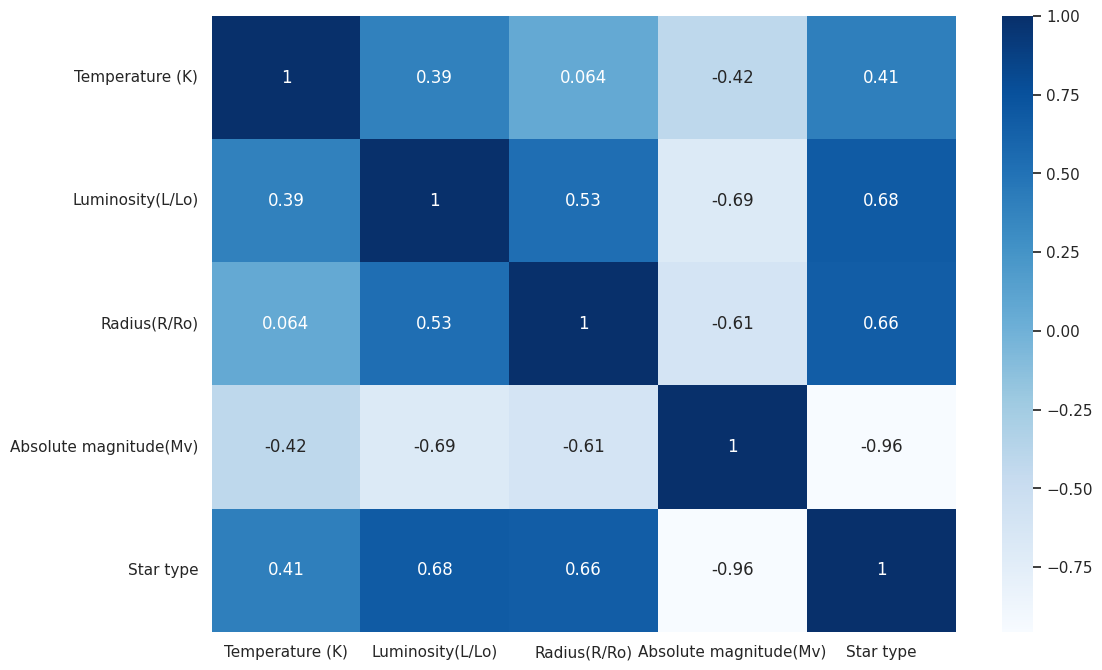

In [13]:
ds = df.drop(['Star color', 'Spectral Class'], axis = 1)
plt.figure(figsize=(12,8))
sns.heatmap(ds.corr(),annot = True, cmap = 'Blues')


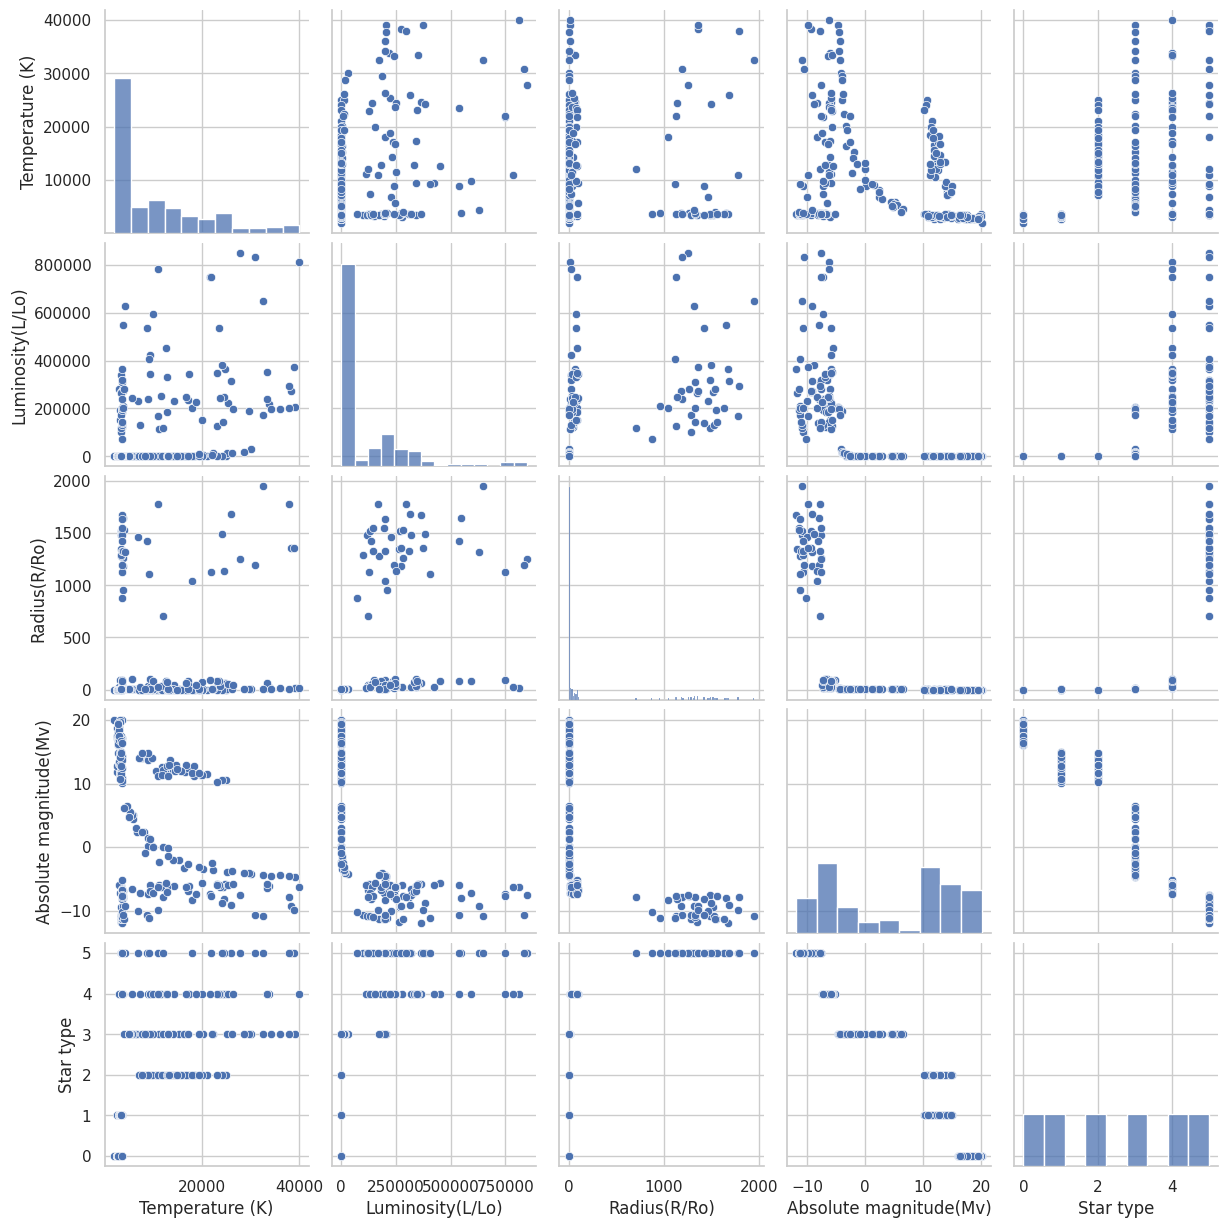

In [15]:
sns.pairplot(df)
plt.show()

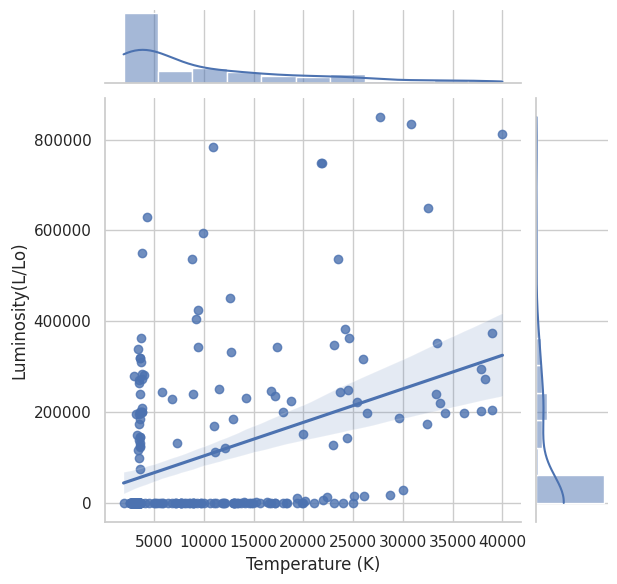

In [17]:
sns.jointplot(data=df, x='Temperature (K)', y='Luminosity(L/Lo)', kind='reg');

In [25]:
# Getting Feature columns
feature = ['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)',
       'Absolute magnitude(Mv)', 'Star color', 'Star type']
X = df[feature]

# getting prediction
y = df['Spectral Class']



Checking if labels or features are categorical! [*]

Features are Categorical

Encoding Features [*]

Encoding Features Done [ ✓ ]

Labels are Categorical [*] 

Encoding Labels 

Encoding Labels Done [ ✓ ]

Converting Sparse Features to array []

Conversion of Sparse Features to array Done [ ✓ ]

Splitting Data into Train and Validation Sets [*]

Splitting Done [ ✓ ]

Scaling Training and Test Sets [*]

Scaling Done [ ✓ ]

Training All Basic Classifiers on Training Set [*] 

Training LogisticRegression() and Showing Predictions [ ✓ ] 

Validation Accuracy is : 0.4166666666666667
Applying K-Fold Cross validation on Model LR[*]
Accuracy: 34.91 %
Standard Deviation: 5.94 %

Training LogisticRegression() Done [ ✓ ] 

########################################################################
Training SVC() and Showing Predictions [ ✓ ] 

Validation Accuracy is : 0.5625
Applying K-Fold Cross validation on Model SVC[*]
Accuracy: 54.68 %
Standard Deviation: 1.31 %

Training SVC() Done [ ✓ ] 

##

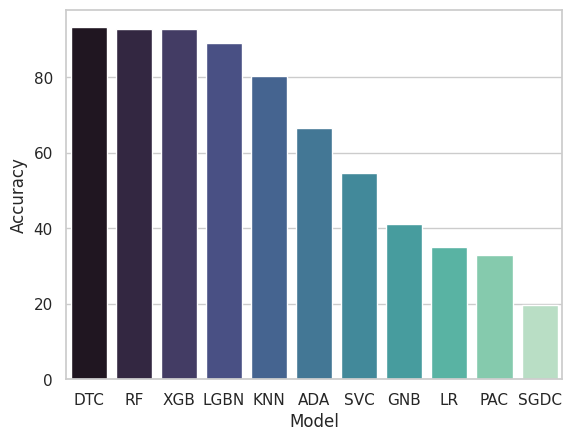

In [26]:
Models.classify(df,X,y,smote = False)